In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
init_z=State(y=3000,v=0)

,values
y,3000
v,0


In [13]:

init_z=State(y=3000,v=0)
t1=10                          #开伞时间
t_end=40
h=0.01
system_z = System(init=init_z,t_0=0,t_end=t_end,dt=h)

def slope_func_z(state, t, system):
    y, v= state
    dt=h
    dvdt=(1/2)*1.225*v*v*1*0.05/85-9.8
    if dvdt<0:
        dydt = v+(-(1/2)*1.225*v*v*1*0.05/85+9.81)*dt
        y=y-0.5*(dydt+v)*dt
    else:
            dydt=v
            y=y-0.5*(dydt+v)*dt
    
    return State(v=dydt,y=y)

In [4]:
def ziyouluoti(state, t, system):
    y, v= state
    dt=h
    dydt=v+9.81*dt
    y=y-0.5*(dydt+v)*dt
    return State(v=dydt,y=y)

In [5]:
ziyouluoti(init_z, 0, system_z)

,values
v,0.098100
y,2999.999509


In [6]:
slope_func_z(init_z, 0, system_z)

,values
v,0.098100
y,2999.999509


In [7]:
def run_simulation(system,slope_func_z,ziyouluoti):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts= linrange(t_0, t_end, dt)
    for t in ts:
        if t<t1:
            frame.row[t+dt] = ziyouluoti(frame.row[t], t, system)
        else:
                frame.row[t+dt] = slope_func_z(frame.row[t], t, system)
    
    return frame

In [8]:
results = run_simulation(system_z , slope_func_z,ziyouluoti)

,y,v
0.00,3000,0
0.01,3000,0.0981
0.02,3000,0.1962
0.03,3000,0.2943
0.04,2999.99,0.3924
...,...,...
39.96,-1825.84,162.65
39.97,-1827.46,162.653
39.98,-1829.09,162.656
39.99,-1830.72,162.659


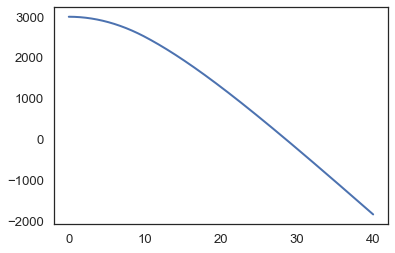

In [9]:
plot(results.y)

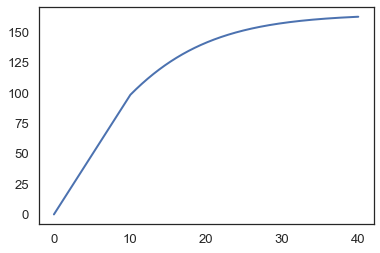

In [10]:
plot(results.v)